# Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras
# Problem Description
The problem is about the International Airline Passengers prediction problem.

This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

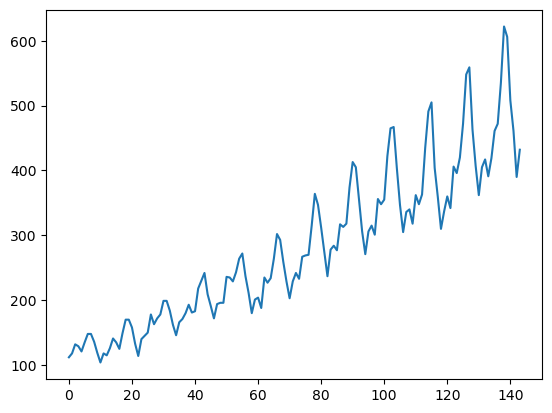

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv(r"D:\Generative AI\Deep_Learning\airline-passengers.csv", usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

# LSTM Network for Regression
You can phrase the problem as a regression problem.

That is, given the number of passengers (in units of thousands) this month, what is the number of passengers next month?

#### let’s first import all the functions and classes we will use. For that we need the Keras deep learning library installed.

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### Let's fix the random number seed to ensure your results are reproducible.

In [3]:
# fix random seed for reproducibility
tf.random.set_seed(7)

#### Here we have extract the NumPy array from the dataframe and convert the integer values to floating point values, which are more suitable for modeling with a neural network.

In [4]:
# load the dataset
dataframe = pd.read_csv(r"D:\Generative AI\Deep_Learning\airline-passengers.csv", usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#### With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets, with 67% of the observations used to train the model, leaving the remaining 33% for testing the model.

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


Now, we can define a function to create a new dataset, as described above.

The function takes two arguments: the dataset, which is a NumPy array you want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period—in this case, defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t), and Y is the number of passengers at the next time (t + 1).

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#### Let’s take a look at the effect of this function on the first rows of the dataset

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#### Currently, the data is in the form of [samples, features], and we are framing the problem as one time step for each sample. You can transform the prepared train and test input data into the expected structure using numpy.reshape()

In [9]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### You are now ready to design and fit your LSTM network for this problem.

##### The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs, and a batch size of 1 is used.

In [10]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


C:\Users\Sreedhar\anaconda4\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 26ms/step - loss: 0.0274
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0126
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0102
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0092
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0083
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0074
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0065
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0056
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0048
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0041
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0036
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0031
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0027
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0025
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0020
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0020
Epoch 21/100
94/94 -

#### Once the model is fit, you can estimate the performance of the model on the train and test datasets. This will give you a point of comparison for new models.

#### Note that you will invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Train Score: 22.71 RMSE
Test Score: 50.92 RMSE


#### Finally, we have generate predictions using the model for both the train and test dataset to get a visual indication of the skill of the model.

#### Because of how the dataset was prepared, you must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in green, and the predictions on the unseen test dataset in red.

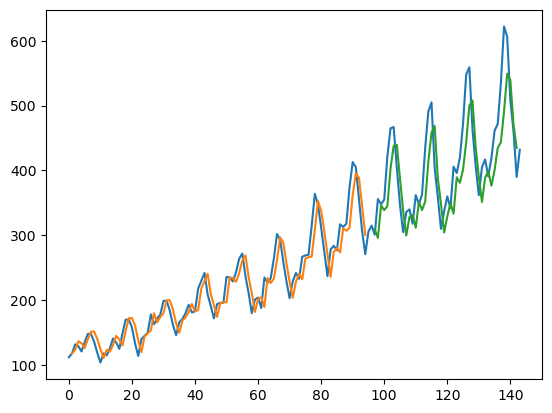

In [12]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Predict the output for next 10 days

Predictions for the next 10 days:
[[434.77798]
 [413.56104]
 [395.90936]
 [380.9094 ]
 [367.9491 ]
 [356.60095]
 [346.55573]
 [337.58334]
 [329.50842]
 [322.19458]]


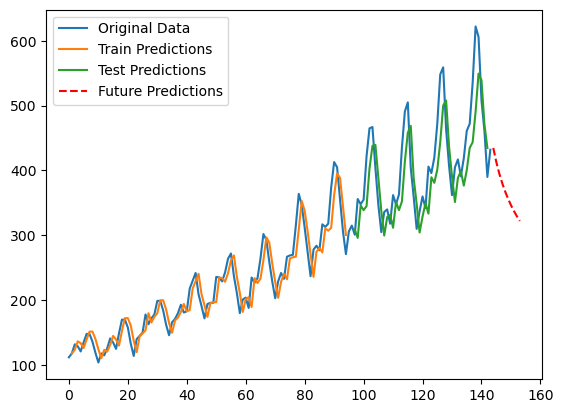

In [17]:
# Predict next 10 days
future_predictions = []
current_input = testX[-1]  # Start with the last input from the test data

for _ in range(10):  # Generate predictions for the next 10 days
    # Ensure the input shape is correct for the LSTM model
    prediction = model.predict(current_input.reshape(1, 1, look_back), verbose=0)
    future_predictions.append(prediction[0, 0])  # Store the predicted value

    # Update current_input with the predicted value for the next step
    current_input = np.array([prediction])  # Use prediction as the new input

# Convert future predictions to original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Print the predictions
print("Predictions for the next 10 days:")
print(future_predictions)

# Plot the predictions alongside the original data
futurePlot = np.empty((len(dataset) + 10, 1))  # Extend plot size for future predictions
futurePlot[:, :] = np.nan
futurePlot[len(dataset):len(dataset) + 10, :] = future_predictions  # Add future predictions

plt.plot(scaler.inverse_transform(dataset), label="Original Data")
plt.plot(trainPredictPlot, label="Train Predictions")
plt.plot(testPredictPlot, label="Test Predictions")
plt.plot(futurePlot, label="Future Predictions", linestyle="dashed", color="red")
plt.legend()
plt.show()
